# Creating a convolutional neural network

## Dataset
The problem we will consider here is classifying 10 different everyday objects. The dataset we will use is built into tensorflow and called the [**CIFAR Image Dataset.**](https://www.cs.toronto.edu/~kriz/cifar.html) It contains 60,000 32x32 color images with 6000 images of each class. 

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170508288/170498071 [==============================] - 2s 0us/step


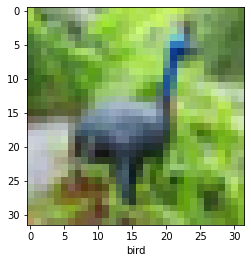

In [ ]:
# Let's look at a one image
IMG_INDEX = 6  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

## CNN Architecture


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

## Adding Dense Layers

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

## Training

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 17s 5ms/step - loss: 1.5169 - accuracy: 0.4468 - val_loss: 1.2656 - val_accuracy: 0.5498
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1588 - accuracy: 0.5888 - val_loss: 1.1154 - val_accuracy: 0.6088
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0145 - accuracy: 0.6440 - val_loss: 0.9951 - val_accuracy: 0.6495
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9111 - accuracy: 0.6796 - val_loss: 0.9954 - val_accuracy: 0.6558
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8369 - accuracy: 0.7066 - val_loss: 0.9287 - val_accuracy: 0.6774
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7816 - accuracy: 0.7246 - val_loss: 0.8643 - val_accuracy: 0.7012
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7339 - accuracy: 0.7409 - val_loss: 0.8655 - val_accuracy

## Model evaluation

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'Accuracy: {test_acc}')

313/313 - 1s - loss: 0.8711 - accuracy: 0.7060 - 941ms/epoch - 3ms/step
Accuracy: 0.7059999704360962


In [ ]:
index = 1

input = test_images[:index]

predictions = model.predict(input)
predictions

array([[-1.9807293 , -2.202849  , -1.4207715 ,  3.5024166 , -4.798875  ,
         1.3222076 , -0.681767  , -3.6263657 ,  0.07970273, -3.5845416 ]],
      dtype=float32)

## Data Augmentation


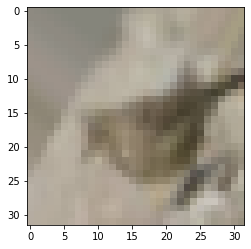

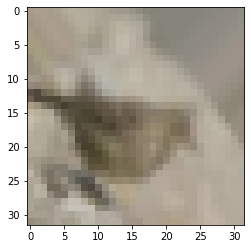

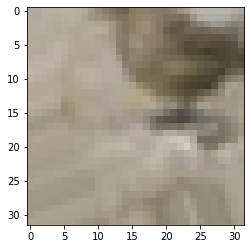

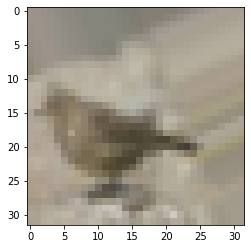

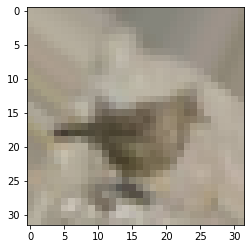

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=90,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
validation_split=.2,
fill_mode='nearest')

# pick an image to transform
test_img = train_images[120]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()

## Pretrained model

In [ ]:
#Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

### Dataset

In [ ]:
import tensorflow_datasets as tfds

# split the data manually into 80% training, 10% testing, 10% validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'horses_or_humans',
    split=['train[:80%]', 'train[80%:90%]', 'test'],
    with_info=True,
    as_supervised=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteR2696K/horses_or_humans-train.tfrecord


  0%|          | 0/1027 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteR2696K/horses_or_humans-test.tfrecord


  0%|          | 0/256 [00:00<?, ? examples/s]

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


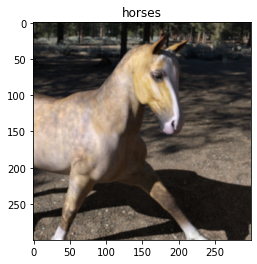

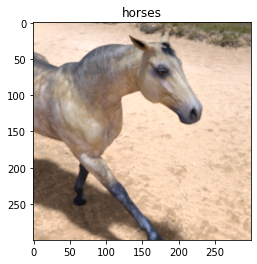

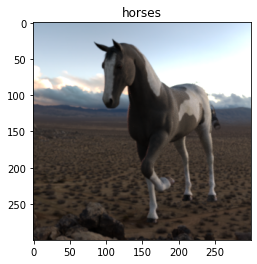

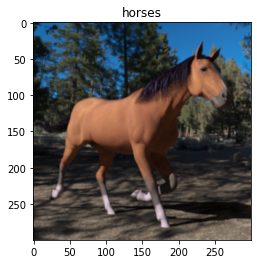

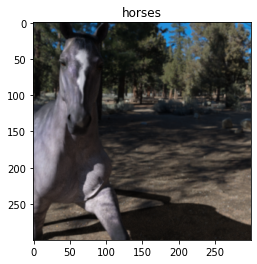

In [ ]:
get_label_name = metadata.features['label'].int2str  # creates a function object that we can use to get labels

# display 2 images from the dataset
for image, label in raw_train.take(5):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [ ]:
for img, label in raw_train.take(5):  
  print("Original shape:", img.shape)

Original shape: (300, 300, 3)
Original shape: (300, 300, 3)
Original shape: (300, 300, 3)
Original shape: (300, 300, 3)
Original shape: (300, 300, 3)


In [ ]:
IMG_SIZE = 128 # All images will be resized to 160x160

def format_example(image, label):
  """
  returns an image that is reshaped to IMG_SIZE
  """
  image = tf.cast(image, tf.float32)
  image = (image/255)
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [ ]:
train = raw_train
validation = raw_validation
test = raw_test

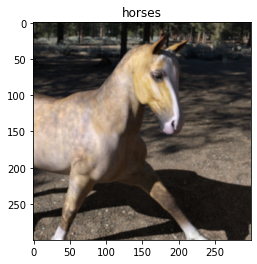

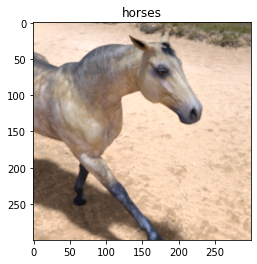

In [ ]:
for image, label in train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [ ]:
for img, label in raw_train.take(2):  
  print("Original shape:", img.shape)

for img, label in train.take(2):
  print("New shape:", img.shape)

Original shape: (300, 300, 3)
Original shape: (300, 300, 3)
New shape: (300, 300, 3)
New shape: (300, 300, 3)


### Picking pre-trained model


In [ ]:
IMG_SHAPE = (300, 300, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 150, 150, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 150, 150, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
for image, _ in train_batches.take(1):
   pass

feature_batch = base_model(image)
print(feature_batch.shape)

(32, 10, 10, 1280)


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 150, 150, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 150, 150, 32  128         ['Conv1[0][0]']                  
                                )                                              

### Adding top layers (our classifier)

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [ ]:
prediction_layer = keras.layers.Dense(1)

In [ ]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 10, 10, 1280)     2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


### Training

In [ ]:
base_learning_rate = 0.00001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Evaluating model before training it to check how it performs

In [ ]:
# We can evaluate the model right now to see how it does before training it on our new images
initial_epochs = 20
validation_steps=20

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

 3/20 [===>..........................] - ETA: 4s - loss: 0.5358 - accuracy: 0.7812WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 20 batches). You may need to use the repeat() function when building your dataset.


20/20 [==============================] - 1s 34ms/step - loss: 0.5302 - accuracy: 0.7843


In [ ]:
# Now we can train it on our images
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

acc = history.history['accuracy']
f'Accuracy {acc}'

Epoch 1/20
26/26 [==============================] - 6s 93ms/step - loss: 0.5045 - accuracy: 0.6946 - val_loss: 0.5282 - val_accuracy: 0.7843
Epoch 2/20
26/26 [==============================] - 5s 94ms/step - loss: 0.5027 - accuracy: 0.6971 - val_loss: 0.5266 - val_accuracy: 0.7843
Epoch 3/20
26/26 [==============================] - 5s 93ms/step - loss: 0.5009 - accuracy: 0.7007 - val_loss: 0.5249 - val_accuracy: 0.7843
Epoch 4/20
26/26 [==============================] - 5s 96ms/step - loss: 0.4990 - accuracy: 0.7032 - val_loss: 0.5235 - val_accuracy: 0.7843
Epoch 5/20
26/26 [==============================] - 5s 94ms/step - loss: 0.4971 - accuracy: 0.7105 - val_loss: 0.5215 - val_accuracy: 0.7941
Epoch 6/20
26/26 [==============================] - 5s 94ms/step - loss: 0.4953 - accuracy: 0.7105 - val_loss: 0.5201 - val_accuracy: 0.7941
Epoch 7/20
26/26 [==============================] - 5s 92ms/step - loss: 0.4934 - accuracy: 0.7153 - val_loss: 0.5184 - val_accuracy: 0.7941
Epoch 8/20
26

'Accuracy [0.6946471929550171, 0.6970803141593933, 0.7007299065589905, 0.7031630277633667, 0.7104622721672058, 0.7104622721672058, 0.7153284549713135, 0.712895393371582, 0.7226277589797974, 0.7238442897796631, 0.727493941783905, 0.7323601245880127, 0.7299270033836365, 0.7396593689918518, 0.7384428381919861, 0.7481752038002014, 0.7469586133956909, 0.7518247961997986, 0.7627737522125244, 0.7603406310081482]'